In [6]:
# DB
from questions.models import Solution, Cluster
from evaluation.models import SolutionConcept, Intruder, TopicName, Concept
from django.db.models import Count

# Helpers
import operator
import pandas as pd
from tqdm import tqdm_notebook
from collections import defaultdict
import numpy as np
import statsmodels

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Cleaning database
last_id = 132
problems = Problem.objects.filter(id__gt=last_id)
# solutions_obj = Solution.objects.filter(problem__in=problems).update(ignore=True)
print("Problems to be ignored: %d" % problems.count())

problems = Problem.objects.filter(id__lte=last_id)
# problems = Problem.objects.all()
print("Problems to be used: %d" % problems.count())

solutions_obj = Solution.objects.filter(problem__in=problems, ignore=False).order_by('id')
# solutions_obj = Solution.objects.all().order_by('id')
print("Solutions to be used: %d" % solutions_obj.count())

docs_id = []
questions = []
solutions = []

# Fill separated structures
for sol in solutions_obj:
    docs_id.append(sol.id)
    questions.append(sol.problem.content)
    solutions.append(sol.content)

print("Got %d documents" %(solutions_obj.count()))

Problems to be ignored: 656
Problems to be used: 132
Solutions to be used: 54
Got 54 documents


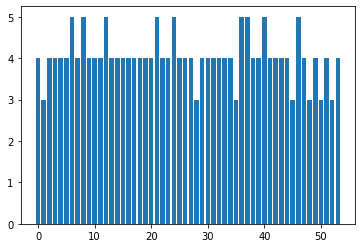

In [18]:
clusters = Cluster.objects.all()
solutions = Solution.objects.filter(id__in=docs_id)
concepts = SolutionConcept.objects.all()
count = concepts.values_list('solution').annotate(count=Count('user', distinct=True))
x, y = zip(*list(count))
# plt.figure(figsize=(10,8))
plt.bar(range(len(x)),y)
plt.show()

In [60]:
count = concepts.values_list('solution__problem__title', 'concept__label').annotate(count=Count('user'))
count

<QuerySet [('List Overlap', 'Loop', 4), ('Count upper case and lower case letters\n', 'Conditional', 1), ('Bank transactions', 'Syntax', 2), ('Hexadecimal to Decimal converter\n', 'Loop', 2), ('Binary and divisible by 5\n', 'Logic', 1), ('Bank transactions', 'Data type: number', 1), ('Robot\n', 'Loop', 4), ('Element Search\n', 'Conditional', 3), ('On or Off?\n', 'Conditional', 5), ('Check Primality Functions\n', 'Function', 1), ('Reverse Word Order\n', 'Syntax', 1), ('Squares in dictionary\n', 'Loop', 4), ('Sorting and deduplicating\n', 'Data type: dict', 1), ('Linear Search and Replace\n', 'Conditional', 2), ('Bank transactions', 'Data type: tuple', 1), ('Palindrome\n', 'Loop', 3), ('All even digits\n', 'Nested loop', 4), ('Max Of Three', 'Logic', 3), ('Digit sum', 'Loop', 3), ('Bank transactions', 'Conditional', 3), '...(remaining elements truncated)...']>

In [ ]:
data = {}
for subject, concept, value in count:
    data[concept] = 

In [52]:
list(data['index']).index(164)

4

In [55]:
list(categories.values_list('id', flat=True)).index(3)

2

In [57]:
categories.filter(id=3)

<QuerySet [<Concept: 3 - Data type: number>]>

In [47]:
%%time
data = {}
categories = Concept.objects.all()
subjects = Solution.objects.filter(id__in=docs_id)
data['index'] = subjects.values_list('id', flat=True)

for category in categories:
    col_data = []
    for subject in subjects:
        count = SolutionConcept.objects.filter(concept=category, solution=subject).count()
        col_data.append(count)
    data[category.label] = col_data

CPU times: user 1.94 s, sys: 65.8 ms, total: 2 s
Wall time: 1min 48s


In [48]:
data

{'index': <QuerySet [25, 29, 57, 163, 164, 165, 166, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, '...(remaining elements truncated)...']>,
 'Syntax': [0,
  3,
  2,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  4,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  3,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  2,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  2,
  2,
  1,
  1,
  0,
  2,
  1],
 'Assignment': [0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  2,
  1,
  0,
  1,
  0,
  0,
  3,
  1,
  1,
  2,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0],
 'Data type: number': [0,
  2,
  3,
  0,
  3,
  1,
  0,
  1,
  1,
  4,
  0,
  0,
  2,
  0,
  2,
  1,
  0,
  0,
  0,
  0,
  3,
  0,
  1,
  1,
  1,
  2,
  3,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  3,
  0,
  0,
  1

In [49]:
df = pd.DataFrame(data)

In [50]:
df

,index,Syntax,Assignment,Data type: number,Data type: boolean,Math,Logic,Data type: string,Data type: tuple,Data type: dict,Conditional,Loop,Nested loop,Function,Recursion,Data type: list (or array)
0,25,0,0,0,0,3,1,0,1,1,1,4,0,0,0,1
1,29,3,0,2,0,3,1,0,0,0,0,0,0,3,0,0
2,57,2,0,3,0,0,0,4,0,0,0,0,0,3,0,0
3,163,0,0,0,0,0,3,0,0,2,0,4,0,3,0,0
4,164,0,0,3,0,4,1,0,3,0,0,0,0,1,0,0
5,165,0,1,1,0,0,2,0,0,0,5,0,1,3,0,0
6,166,1,0,0,0,3,2,2,0,0,0,4,0,0,0,0
7,763,0,0,1,0,2,0,0,0,0,2,4,0,2,0,1
8,764,0,1,1,0,3,1,0,0,0,0,4,0,2,0,0
9,765,0,0,4,1,3,0,0,0,0,0,0,0,5,0,0


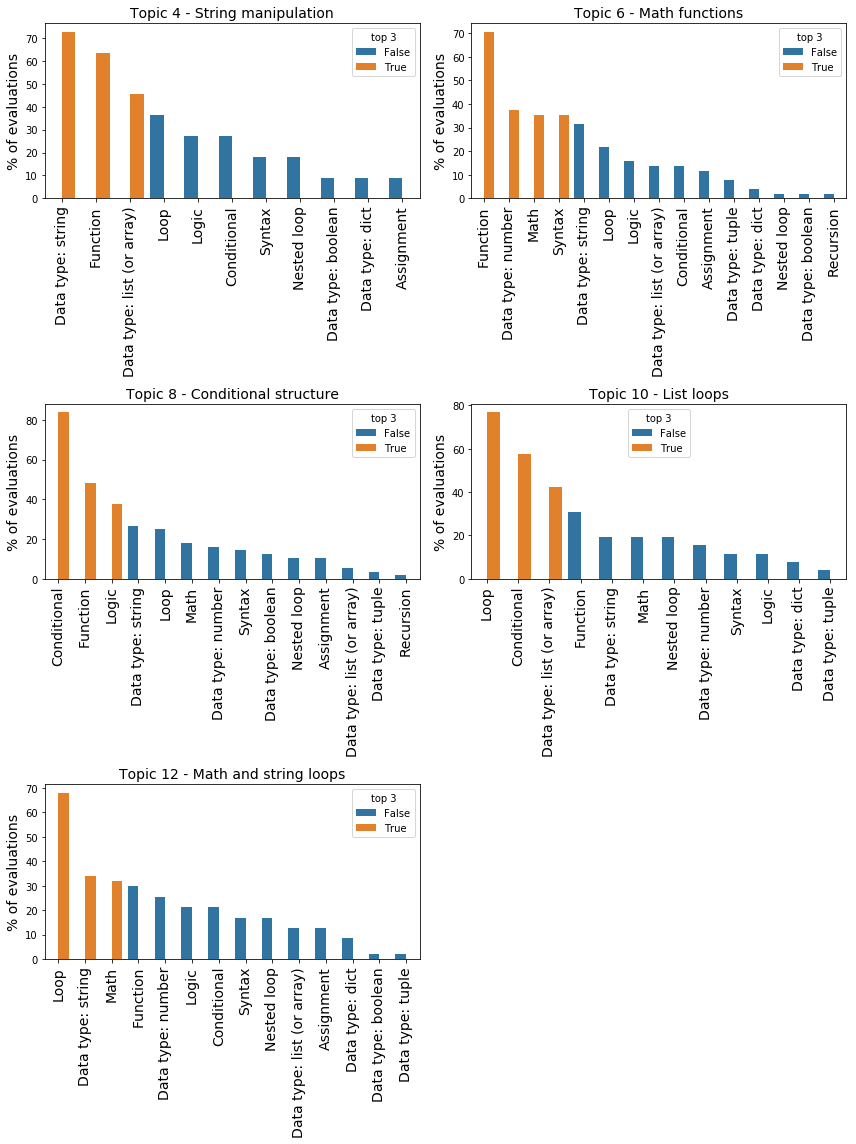

In [8]:
concept_solution = []
fig = plt.figure(figsize=(12,16))
for idx_cluster, cluster in enumerate(clusters):
    # Get solutions belonging to cluster
    solution_cluster = solutions.filter(cluster=cluster)
    
    # Get voted concepts
    concept_solution = concepts.filter(solution__in=solution_cluster)
    
    # Calculate max of points a concept can have
    user_count = concept_solution.values_list('solution').annotate(count=Count('user', distinct=True))
    max_points = sum(list(zip(*user_count))[1])
    
    # Count quantity of votes for each concept 
    count = list(concept_solution.values_list('concept__label').annotate(count=Count('concept')))
    count.sort(key=operator.itemgetter(1), reverse=True)
    
    # Transform to percentage and set threshold limit for top 3 results
    df = pd.DataFrame(count, columns=["concept", "count"])
    df['count'] = df.apply(lambda x: x["count"]/max_points*100, axis=1)
    threshold = df.nlargest(3, 'count').tail(1)['count'].tolist()[0]
    df['top 3'] = df.apply(lambda x: True if x["count"] >= threshold else False, axis=1)
    
    # Plot
    subplot = 321 + idx_cluster
    fig.add_subplot(subplot)
    plt.title("Topic %d - %s" % (cluster.id, cluster.label), fontsize=14)
    sns.barplot(x='concept', y='count', hue='top 3', data=df)
    plt.xticks(fontsize=14, rotation=90)
    plt.xlabel("")
    plt.ylabel("% of evaluations", fontsize=14)

plt.tight_layout()
plt.savefig("images/evaluation.png")
plt.savefig("images/evaluation.eps", format="eps")
plt.show()

In [9]:
# Scores
scores = defaultdict(dict)
clusters = list(Cluster.objects.all().values_list('id', flat=True).distinct().order_by('id'))
confusion = np.zeros((len(clusters), len(clusters)))
total = np.zeros((len(clusters), len(clusters)))

# Get all user and cluster combinations
user_cluster = Intruder.objects.all().values_list('user', 'cluster').distinct()

for uc in tqdm_notebook(user_cluster):
    # Get solution classified as intruder by the user for given cluster
    # There should be only one per group, so using get shouldn't raise any errors
    user_intruder = Intruder.objects.get(user=uc[0], cluster=uc[1], intruder=True)
    scores[user_intruder.cluster.label]["label"] = user_intruder.cluster.label
    
    # Get correct answers
    actual_intruder = Intruder.objects.exclude(solution__cluster__id=user_intruder.cluster.id).get(
        user=uc[0], cluster=uc[1])
    expected = clusters.index(actual_intruder.cluster.id)
    predicted = clusters.index(actual_intruder.solution.cluster.id)
    
    # If it's actually an intruder
    if user_intruder.cluster != user_intruder.solution.cluster:
        try:
            scores[user_intruder.cluster.label]["correct"] += 1
        except KeyError:
            scores[user_intruder.cluster.label]["correct"] = 1
    else:
        try:
            scores[user_intruder.cluster.label]["wrong"] += 1
        except KeyError:
            scores[user_intruder.cluster.label]["wrong"] = 1
            
        # Create confusion matrix (rows are correct, columns are inferred)
        confusion[expected, predicted] += 1
    
    # Count to compare number of 
    total[expected, predicted] += 1

In [10]:
confusion_percent = np.true_divide(confusion, total)
confusion_percent

/home/lmoraes/miniconda3/envs/machineteaching/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[       nan, 0.5       , 0.5       , 0.66666667, 0.4       ],
       [       nan,        nan, 0.6       , 0.5       , 1.        ],
       [       nan, 0.14285714,        nan, 0.        , 0.33333333],
       [1.        , 0.5       , 0.2       ,        nan, 0.66666667],
       [0.        , 0.25      , 0.        , 1.        ,        nan]])

In [11]:
clusters = list(Cluster.objects.all().values_list('label', flat=True).distinct().order_by('id'))
confusion_df = pd.DataFrame(confusion_percent, columns=clusters, index=clusters)
confusion_df

,String manipulation,Math functions,Conditional structure,List loops,Math and string loops
String manipulation,NaN,0.500000,0.5,0.666667,0.400000
Math functions,NaN,NaN,0.6,0.500000,1.000000
Conditional structure,NaN,0.142857,NaN,0.000000,0.333333
List loops,1.0,0.500000,0.2,NaN,0.666667
Math and string loops,0.0,0.250000,0.0,1.000000,NaN


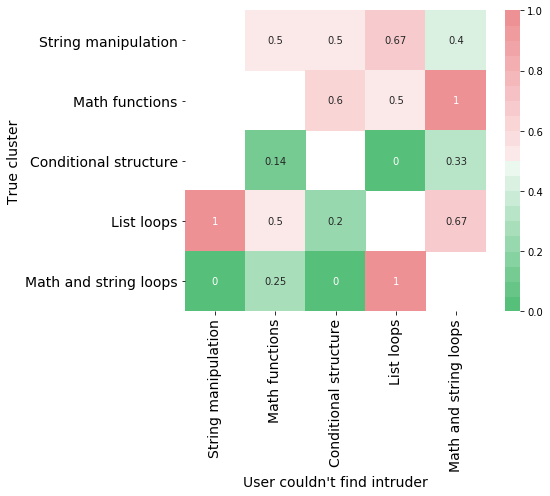

In [18]:
cmap = sns.diverging_palette(138, 10, l=70, n=20)
plt.figure(figsize=(8,7))
sns.heatmap(confusion_df, annot=True, cmap=cmap)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("User couldn't find intruder", fontsize=14)
plt.ylabel("True cluster", fontsize=14)
plt.tight_layout()
plt.savefig("images/confusion_matrix.png")
plt.savefig("images/confusion_matrix.eps", format="eps")
plt.show()

In [13]:
df = pd.DataFrame.from_dict(scores, orient='index')
df = df.sort_values('correct', ascending=False)

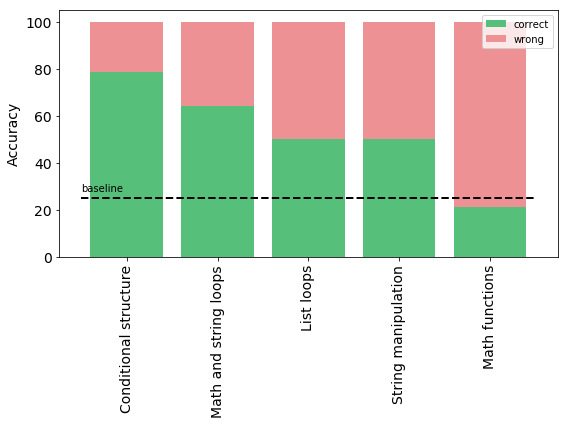

In [19]:
# From raw value to percentage
totals = [i+j for i,j in zip(df['correct'], df['wrong'])]
correctBars = [i / j * 100 for i,j in zip(df['correct'], totals)]
wrongBars = [i / j * 100 for i,j in zip(df['wrong'], totals)]

plt.figure(figsize=(8,6))
# Create correct Bars
plt.bar(df.index, correctBars, color=cmap[0], label="correct")
# Create wrong Bars
plt.bar(df.index, wrongBars, color=cmap[-1], bottom=correctBars, label="wrong")
# # Create blue Bars

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()

# Plot baseline
plt.plot([-0.5, 4.5], [25, 25], 'k--', lw=2)
plt.text(-0.5, 28, "baseline")

# Show graphic
plt.tight_layout()
plt.savefig("images/accuracy.png")
plt.savefig("images/accuracy.eps", format="eps")
plt.show()

In [311]:
from collections import Counter
from wordcloud import WordCloud

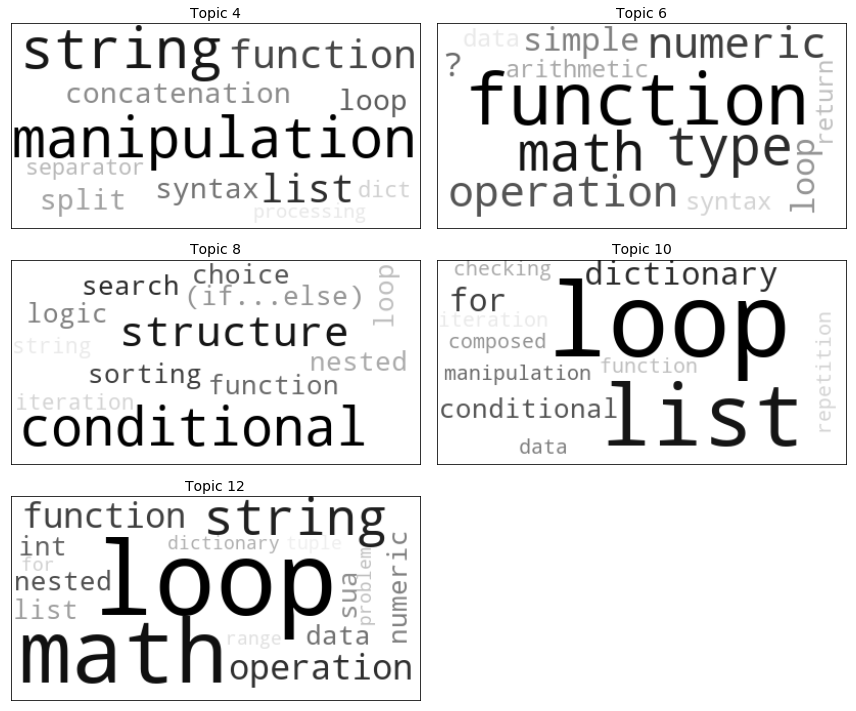

In [334]:
stopwords = ["de", "e", "em", "and", "sua", "com"]
en_pt = {
    "function": "funçõe",
    "math": "matemática",
    "list": "lista",
    "conditional": "condicional"
}
pt_en = {
    "funçõe": "function",
    "função": "function",
    "matemática": "math",
    "tipo": "type",
    "numérico": "numeric",
    "operaçõe": "operation",
    "aritmética": "arithmetic",
    "retorno": "return",
    "dado": "data",
    "manipulação": "manipulation",
    "lista": "list",
    "concatenação": "concatenation",
    "separadore": "separator",
    "processamento": "processing",
    "condicional": "conditional",
    "estrutura": "structure",
    "pesquisa": "search",
    "ordenação": "sorting",
    "iteração": "iteration",
    "aninhado": "nested",
    "dicionário": "dictionary",
    "composto": "composed",
    "laço": "loop",
    "repetição": "repetition"
}

cluster = TopicName.objects.all().values_list('cluster').distinct().order_by('cluster__id')
plt.figure(figsize=(12,10))
for idx_cluster,c in enumerate(cluster):
    names = TopicName.objects.filter(cluster=c)
    tokens = []
    for n in names:
        tmp_tokens = n.label.lower().replace(",","").split(" ")
        tmp_tokens = [t.strip() for t in tmp_tokens if t not in stopwords]
        tmp_tokens = [t.rstrip('s') for t in tmp_tokens if t not in stopwords]
        tmp_tokens = [pt_en[t] if t in pt_en.keys() else t for t in tmp_tokens]
        tokens += tmp_tokens
    c_tokens = Counter(tokens)
    sorted(c_tokens.items(), key = lambda x:x[1] , reverse=True)
    cs = list(zip(*sorted(c_tokens.items(), key = lambda x:x[1] , reverse=True)))[0]
    wc = WordCloud(background_color="white", max_words=1000, color_func=colormap_color_func("gray", frequencies=cs))
    # generate word cloud
    wc.generate_from_frequencies(c_tokens)
    # Plot
    ax= plt.subplot(3, 2 ,idx_cluster+1)
    ax.set_title("Topic %d" % c[0], fontsize=14)
    im = ax.imshow(wc, interpolation="bilinear")
    plt.tick_params(
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
#     ax.axis("off")
plt.tight_layout()
plt.savefig("images/topic_names.png")
plt.savefig("images/topic_names.eps", format="eps")
plt.show()

In [326]:
class colormap_color_func(object):
    """Color func created from matplotlib colormap.
    Parameters
    ----------
    colormap : string or matplotlib colormap
        Colormap to sample from
    Example
    -------
    >>> WordCloud(color_func=colormap_color_func("magma"))
    """
    def __init__(self, colormap, frequencies):
        import matplotlib.pyplot as plt
        self.colormap = plt.cm.get_cmap(colormap, len(frequencies))
        self.frequencies = frequencies

    def __call__(self, word, font_size, position, orientation,
                 random_state=None, **kwargs):
        
        idx = list(self.frequencies).index(word)
        r, g, b, _ = np.maximum(0, 255 * np.array(self.colormap(idx)))
        return "rgb({:.0f}, {:.0f}, {:.0f})".format(r, g, b)